## Квартет Анскомбе 

Детальніше можна почитати  __[тут](https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html#sphx-glr-gallery-specialty-plots-anscombe-py)__

Квартет Анскомбе (Anscombe's quartet) - це група даних  (x, y), у яких однакове математично сподівання, стандартне відхилення, та всі моделі вкладаються в модель лінійної регресії, але якісно всі ці моделі різні. Цей приклад ілюструє  важливість графічного зображення даних. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'red': (x, y1),
    'green': (x, y2),
    'blue': (x, y3),
    'black': (x4, y4)
}

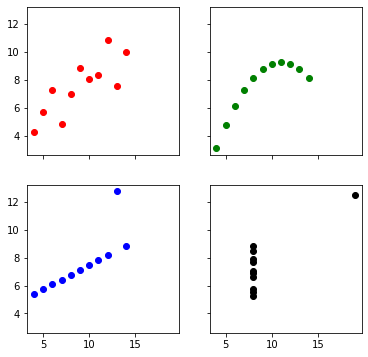

In [2]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6))

colors = ['r', 'g', 'blue', 'black']

for ax, colr, (label, (x, y)) in zip(ax.flat, colors, datasets.items()):
    ax.plot(x, y, 'o',  color = colr)
       
plt.show()


In [3]:
#! pip install statsmodels
import statsmodels.api as sm
from statsmodels.api import OLS 

In [5]:
x1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]).reshape((-1,1))
model1 = sm.OLS(y1,x1)
results1 = model1.fit()
#print(results1.summary())
print(results1.f_pvalue)

1.8117598849584943e-08


Ми бачимо, що дуже мале, а отже, гіпотезу про те, що коефіцієнт регресії нульовий, треба відхилити. Отже, ми приймаємо модель лінійної регресії. Так само з іншими 3ма випадками: 

In [5]:
model2 = sm.OLS(y2,x1)
results2 = model2.fit()
print(results2.f_pvalue)

1.8189263081538412e-08


In [6]:
model3 = sm.OLS(y3,x1)
results3 = model3.fit()
print(results3.f_pvalue)

1.8184049617347677e-08


In [7]:
x44 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]).reshape((-1,1))
model4 = sm.OLS(y4,x44)
results4 = model4.fit()
print(results4.f_pvalue)

1.8092431334383593e-08


Отже, у всіх 4х випадках ми приймаємо модель лінійної регресії, але картинки при цьому абсолютно різні! 